# Part 1

In [1648]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, balanced_accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.metrics import top_k_accuracy_score

In [1649]:
df = pd.read_csv('Agrofood_co2_emission.csv')
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [1650]:
df.shape

(6965, 31)

In [1651]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [1652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [1653]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [1654]:
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [1655]:
df.fillna(df.mean())
df.shape

<ipython-input-1655-f8ddcb03fffc>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


(6965, 31)

In [1656]:
df.replace(np.nan , df.mean(), inplace = True)

<ipython-input-1656-636b1cf5d9be>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.replace(np.nan , df.mean(), inplace = True)


In [1657]:
df.duplicated().sum()

0

<Axes: xlabel='Year'>

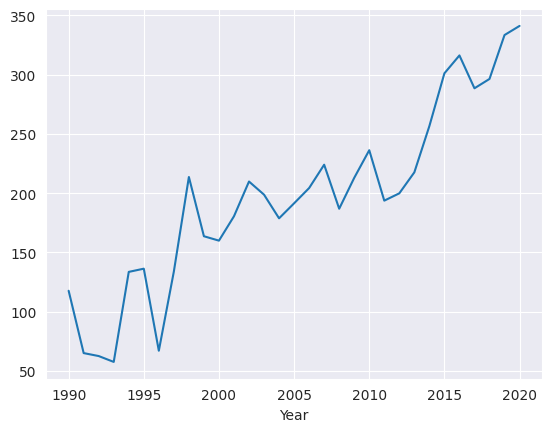

In [1658]:
df.groupby('Year')['Average Temperature °C'].sum().plot()

The total emission of CO2 shows an upward trend, it increases year by year.

The Average rise in temperature also shows an upward trend with time

<Axes: xlabel='Area'>

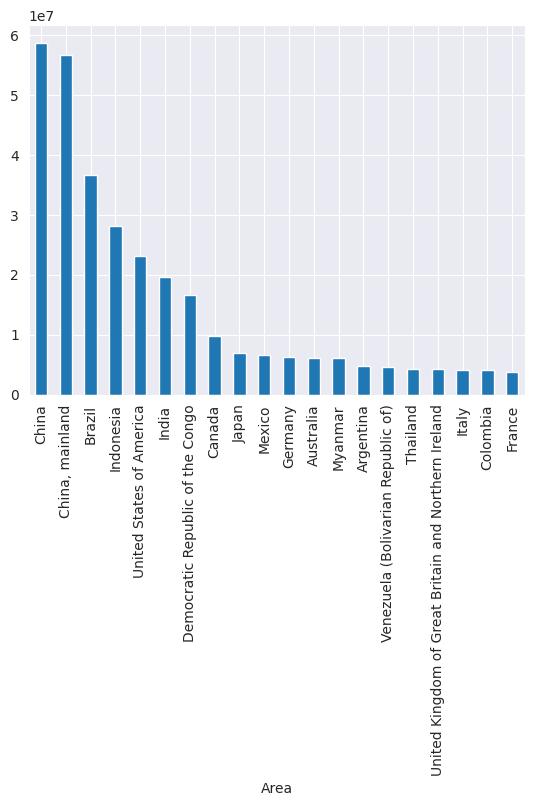

In [1659]:
df.groupby('Area')['total_emission'].sum().sort_values(ascending=False).head(20).plot.bar()

This shows tha Asian countries contribute the most in CO2 emission, China leading by a huge margin

<Axes: xlabel='Area'>

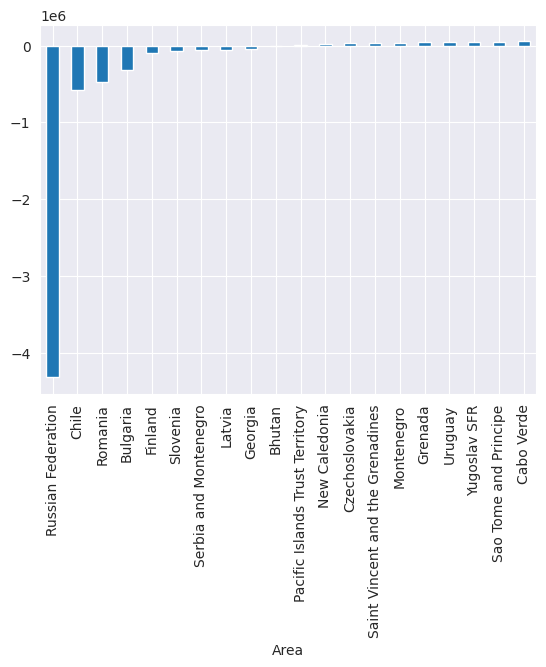

In [1660]:
df.groupby('Area')['total_emission'].sum().sort_values(ascending=True).head(20).plot.bar()

this shows that Russia has contributed the least in the emission of CO2

<Axes: xlabel='Year', ylabel='Average Temperature °C'>

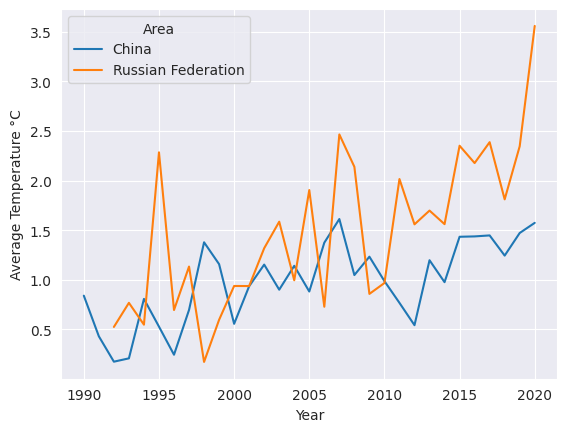

In [1661]:
sns.lineplot(data=df[(df['Area']=='Russian Federation')|(df['Area']=='China')],x='Year',y='Average Temperature °C',hue='Area')

Although the Average Temperature change in Russia is greater than that of China still it has very less CO2 Emission

In [1662]:
data = df.corr()

<ipython-input-1662-c19961bb1c3c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

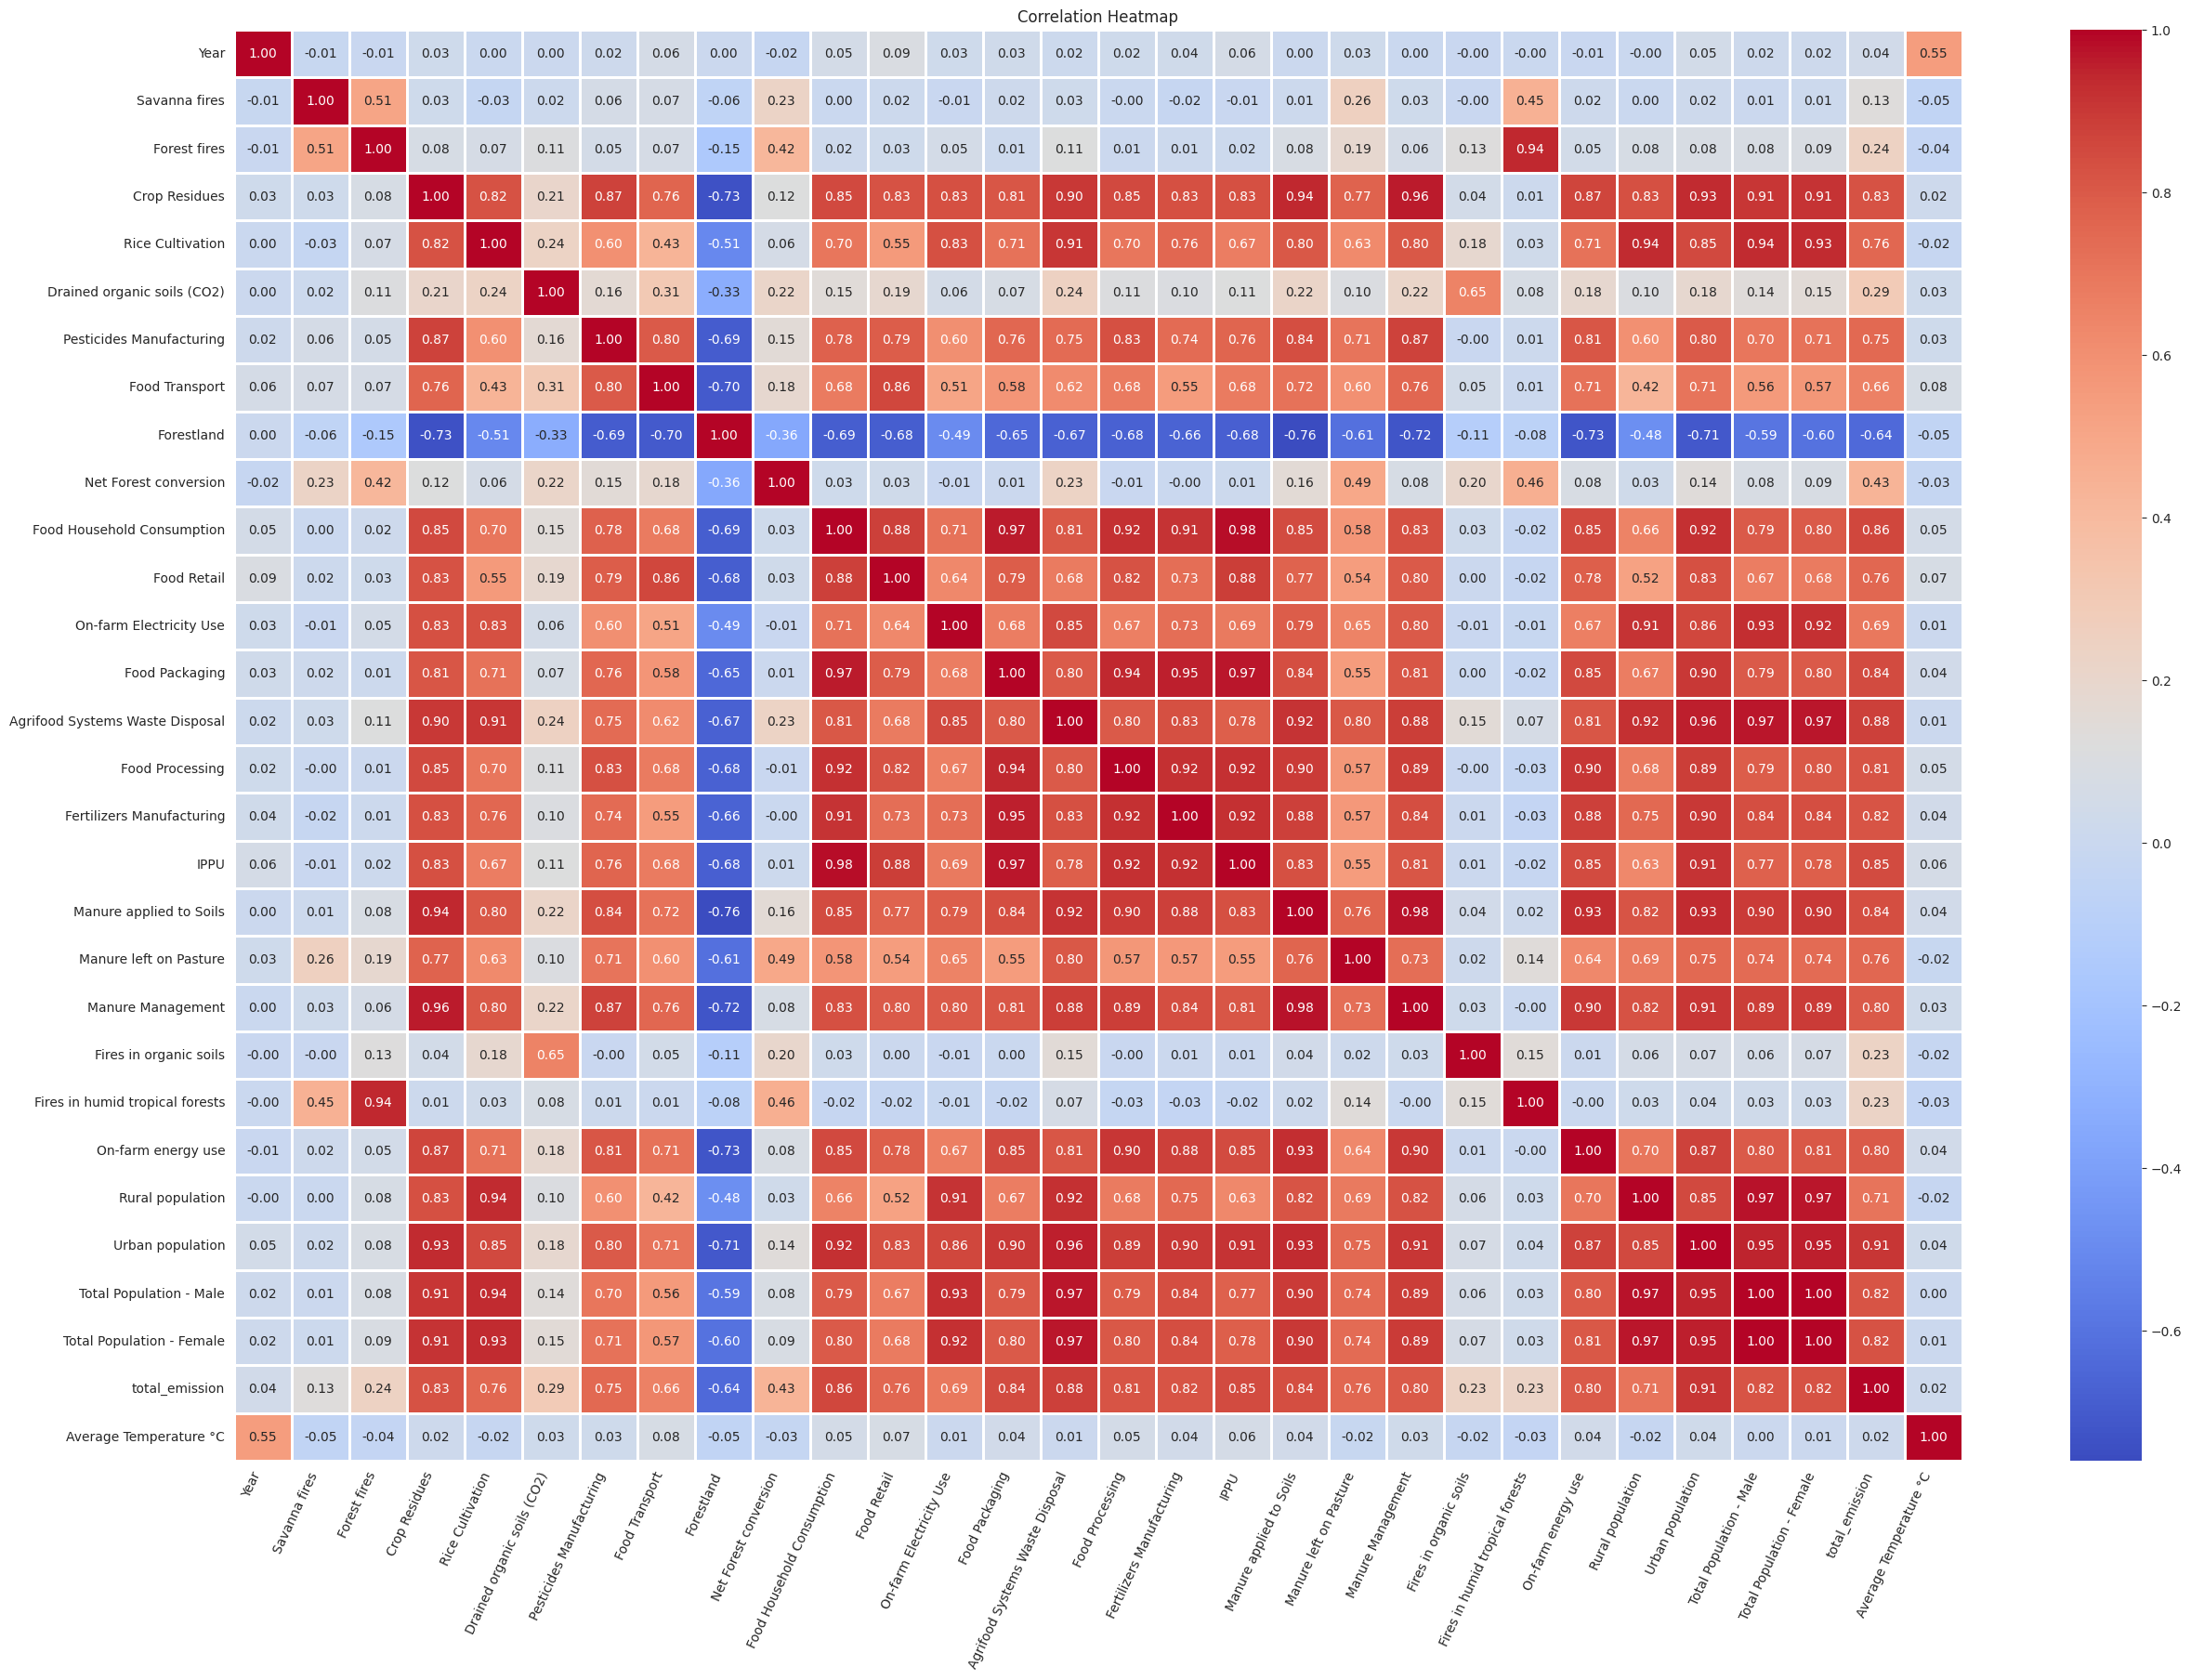

In [1663]:
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=65, horizontalalignment='right')

plt.title('Correlation Heatmap')

In [1664]:
print(data['Average Temperature °C'].sort_values())

Forestland                        -0.048015
Savanna fires                     -0.046508
Forest fires                      -0.037813
Fires in humid tropical forests   -0.034495
Net Forest conversion             -0.030748
Fires in organic soils            -0.023731
Rice Cultivation                  -0.022532
Rural population                  -0.019764
Manure left on Pasture            -0.015928
Total Population - Male            0.003623
Total Population - Female          0.005456
Agrifood Systems Waste Disposal    0.008995
On-farm Electricity Use            0.009081
Crop Residues                      0.017827
total_emission                     0.019043
Pesticides Manufacturing           0.027960
Drained organic soils (CO2)        0.029030
Manure Management                  0.031886
Urban population                   0.036263
On-farm energy use                 0.038966
Food Packaging                     0.040767
Fertilizers Manufacturing          0.041462
Manure applied to Soils         

In [1665]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()['Average Temperature °C']
    for i in range(len(corr_matrix)):
        if abs(corr_matrix.iloc[i]) >= threshold:
            colname = corr_matrix.index[i]
            col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.04)
dataset = df[corr_features]
dataset

<ipython-input-1665-be08163baa1a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()['Average Temperature °C']
<ipython-input-1665-be08163baa1a>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dataset = df[corr_features]


,IPPU,Food Packaging,Forestland,Year,Food Retail,Manure applied to Soils,Average Temperature °C,Food Household Consumption,Food Transport,Savanna fires,Food Processing,Fertilizers Manufacturing
0,209.9778,67.631366,-2388.8030,1990,109.6446,260.1431,0.536167,79.0851,63.1152,14.7237,252.21419,11.997000
1,217.0388,67.631366,-2388.8030,1991,116.6789,268.6292,0.020667,80.4885,61.2125,14.7237,252.21419,12.853900
2,222.1156,67.631366,-2388.8030,1992,126.1721,264.7898,-0.259583,80.7692,53.3170,14.7237,252.21419,13.492900
3,201.2057,67.631366,-2388.8030,1993,81.4607,261.7221,0.101917,85.0678,54.3617,14.7237,252.21419,14.055900
4,182.2905,67.631366,-2388.8030,1994,90.4008,267.6219,0.372250,88.8058,53.9874,14.7237,252.21419,15.126900
...,...,...,...,...,...,...,...,...,...,...,...,...
6960,858.9820,22.910800,76500.2982,2016,443.0872,96.1332,1.120250,251.2681,251.1465,1190.0089,317.07440,2585.080847
6961,889.4250,18.985700,76500.2982,2017,445.3881,81.2314,0.046500,203.1236,255.7975,1431.1407,332.77590,1227.240253
6962,966.2650,19.057000,76500.2982,2018,492.8599,81.0712,0.516333,211.1539,327.0897,1557.5830,348.51070,1127.687805
6963,945.9420,17.951400,76500.2982,2019,542.5922,85.7211,0.985667,228.6381,290.1893,1591.6049,327.82090,2485.528399


In [1666]:
dataset.shape

(6965, 12)

In [1667]:
dataset.columns

Index(['IPPU', 'Food Packaging', 'Forestland', 'Year', 'Food Retail',
       'Manure applied to Soils', 'Average Temperature °C',
       'Food Household Consumption', 'Food Transport', 'Savanna fires',
       'Food Processing', 'Fertilizers Manufacturing'],
      dtype='object')

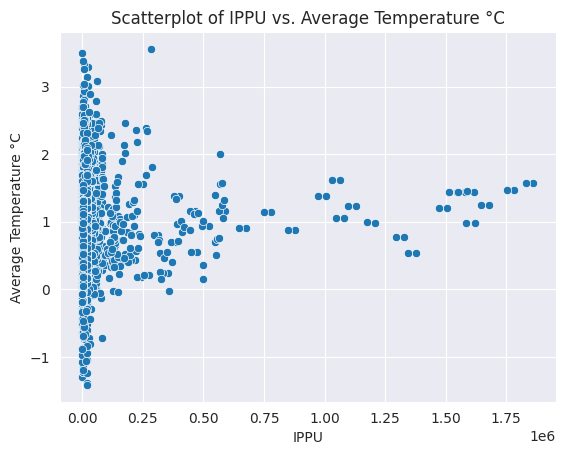

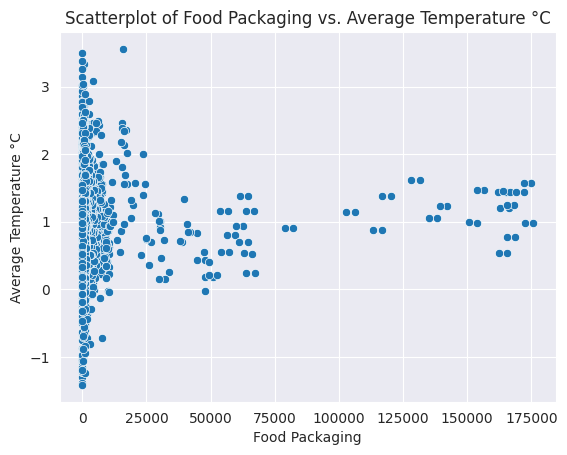

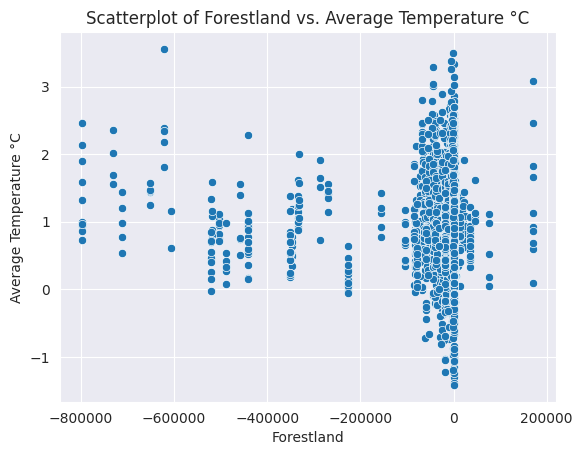

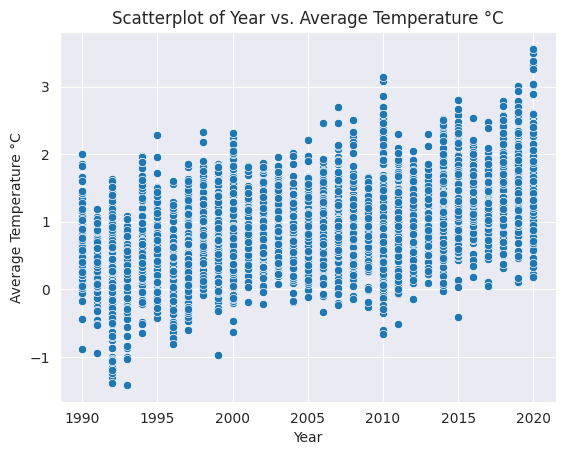

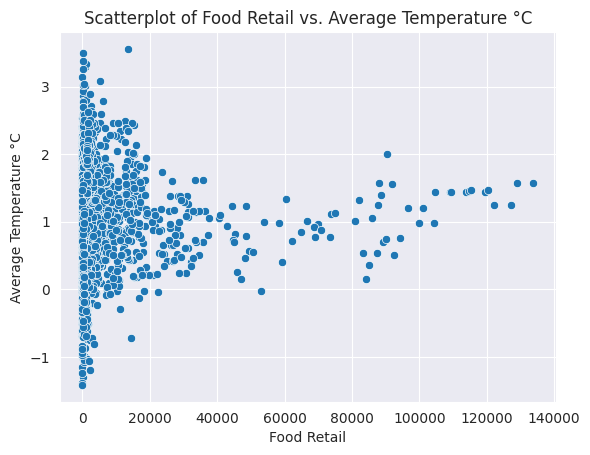

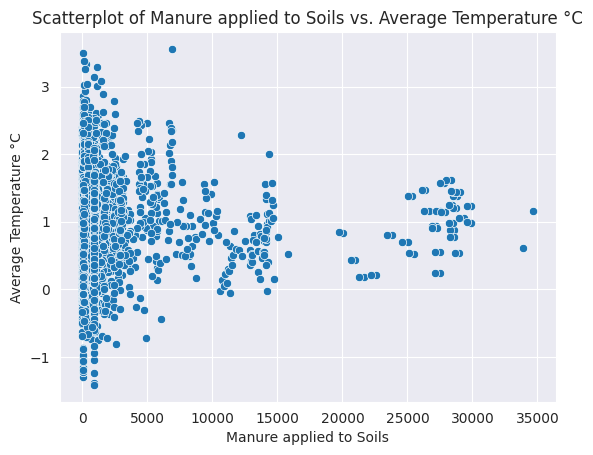

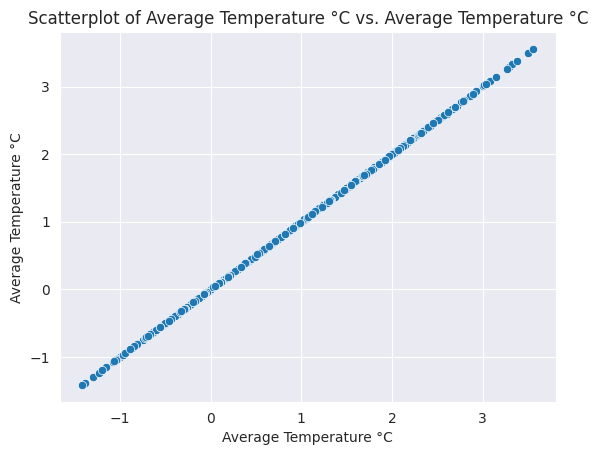

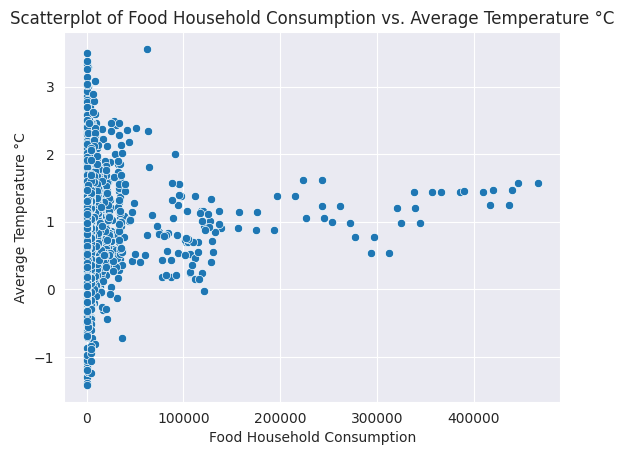

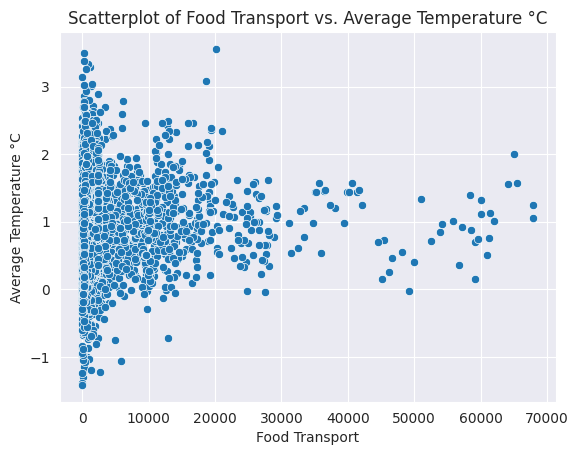

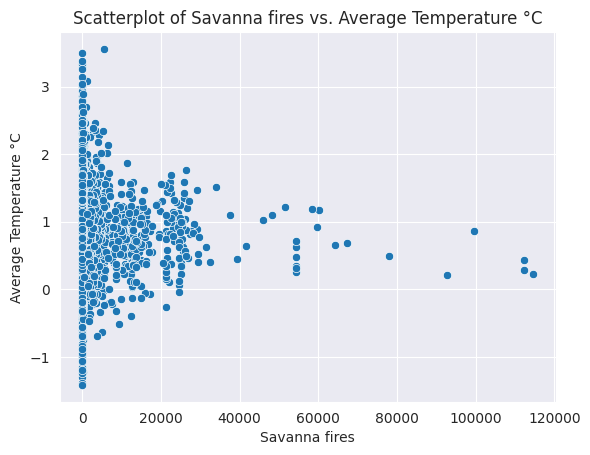

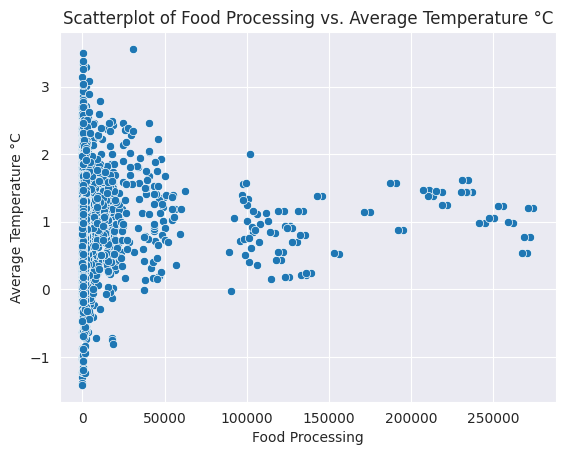

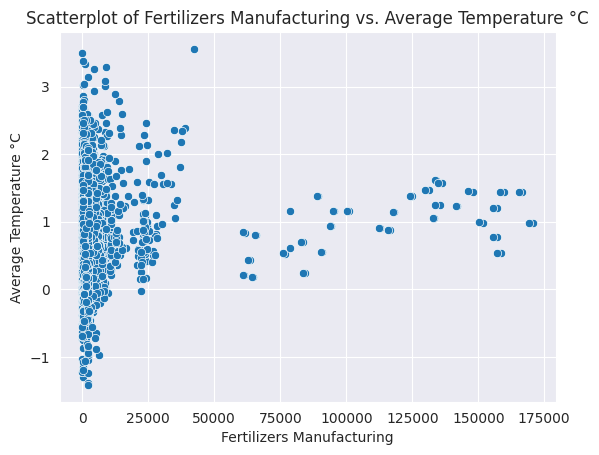

In [1668]:
for col in dataset.columns:
    sns.scatterplot(x = col, y = dataset.columns[-6], data = dataset)
    plt.title(f"Scatterplot of {col} vs. {dataset.columns[-6]}")
    plt.show()

In [1669]:
dataset

,IPPU,Food Packaging,Forestland,Year,Food Retail,Manure applied to Soils,Average Temperature °C,Food Household Consumption,Food Transport,Savanna fires,Food Processing,Fertilizers Manufacturing
0,209.9778,67.631366,-2388.8030,1990,109.6446,260.1431,0.536167,79.0851,63.1152,14.7237,252.21419,11.997000
1,217.0388,67.631366,-2388.8030,1991,116.6789,268.6292,0.020667,80.4885,61.2125,14.7237,252.21419,12.853900
2,222.1156,67.631366,-2388.8030,1992,126.1721,264.7898,-0.259583,80.7692,53.3170,14.7237,252.21419,13.492900
3,201.2057,67.631366,-2388.8030,1993,81.4607,261.7221,0.101917,85.0678,54.3617,14.7237,252.21419,14.055900
4,182.2905,67.631366,-2388.8030,1994,90.4008,267.6219,0.372250,88.8058,53.9874,14.7237,252.21419,15.126900
...,...,...,...,...,...,...,...,...,...,...,...,...
6960,858.9820,22.910800,76500.2982,2016,443.0872,96.1332,1.120250,251.2681,251.1465,1190.0089,317.07440,2585.080847
6961,889.4250,18.985700,76500.2982,2017,445.3881,81.2314,0.046500,203.1236,255.7975,1431.1407,332.77590,1227.240253
6962,966.2650,19.057000,76500.2982,2018,492.8599,81.0712,0.516333,211.1539,327.0897,1557.5830,348.51070,1127.687805
6963,945.9420,17.951400,76500.2982,2019,542.5922,85.7211,0.985667,228.6381,290.1893,1591.6049,327.82090,2485.528399


In [1670]:
x = dataset.drop('Average Temperature °C', axis = 1)
y = dataset['Average Temperature °C']

In [1671]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train.head()

,IPPU,Food Packaging,Forestland,Year,Food Retail,Manure applied to Soils,Food Household Consumption,Food Transport,Savanna fires,Food Processing,Fertilizers Manufacturing
5432,3.3593,128.200389,-3.7462,2005,8.6467,1.1439,13.2809,7.0289,0.0000,209.587728,658.540604
2587,2.5969,128.200389,0.0000,1990,1.7103,0.8210,9.1860,4.5731,0.0000,209.587728,658.540604
5636,1.3202,67.631366,0.0000,1994,1.2081,1.7798,1.9781,4.7228,0.0000,209.587728,779.566792
2079,1198.4750,77.578500,-3819.3817,2007,406.9127,77.7347,252.0353,210.4357,0.0257,542.707700,1.492400
4937,362.0210,67.631366,-333.7277,2002,0.4698,194.3499,123.4555,375.5677,2269.6705,218.048208,356.491017


In [1672]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train = pd.DataFrame(x_train)

x_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.193087,-0.139196,0.232482,-0.023740,-0.242055,-0.304653,-0.195284,-0.345198,-0.225411,-0.190519,-0.205031
1,-0.193094,-0.139196,0.232528,-1.712419,-0.242815,-0.304754,-0.195435,-0.345612,-0.225411,-0.190519,-0.205031
2,-0.193105,-0.144087,0.232528,-1.262105,-0.242870,-0.304455,-0.195701,-0.345587,-0.225411,-0.190519,-0.195379
3,-0.182625,-0.143284,0.185571,0.201418,-0.198443,-0.280769,-0.186458,-0.310889,-0.225406,-0.174912,-0.257432
4,-0.189947,-0.144087,0.228425,-0.361476,-0.242950,-0.244402,-0.191211,-0.283035,0.196003,-0.190123,-0.229120


In [1673]:
def calculate_regression_metrics(y_true, y_pred):

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate R-squared (R2)
    r2 = r2_score(y_true, y_pred)

    # Create a dictionary to store the results
    metrics_dict = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    return metrics_dict

In [1674]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
pred = model.predict(x_test)
print(pred)


[0.70962881 0.60598518 1.02870906 ... 0.59741234 0.61622025 0.75054898]


<Axes: xlabel='Average Temperature °C'>

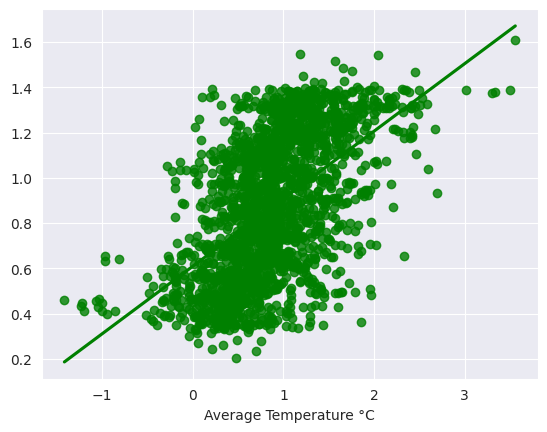

In [1675]:
sns.regplot(x = y_test, y = pred, ci = None, color = 'green')

In [1676]:
result = calculate_regression_metrics(y_test, pred)
print(result)

{'MSE': 0.22425357430747975, 'RMSE': 0.4735541936330833, 'MAE': 0.35791519347024264, 'R2': 0.30102975760103257}


In [1677]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

<Axes: xlabel='Average Temperature °C'>

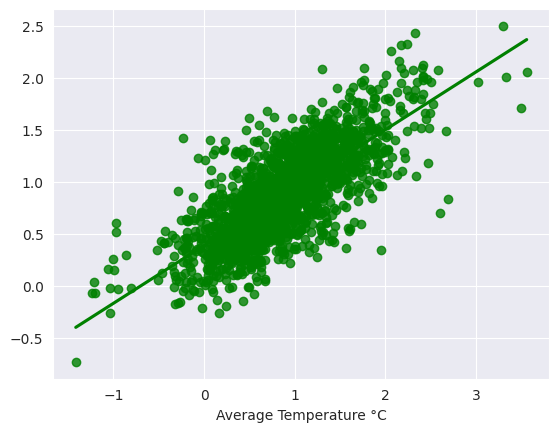

In [1678]:
sns.regplot(x = y_test, y = pred, ci = None, color = 'green')

In [1679]:
result = calculate_regression_metrics(y_test, pred)
print(result)

{'MSE': 0.13940344327375137, 'RMSE': 0.37336770518317647, 'MAE': 0.26961103385742957, 'R2': 0.5654969654900401}


In [1680]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

<Axes: xlabel='Average Temperature °C'>

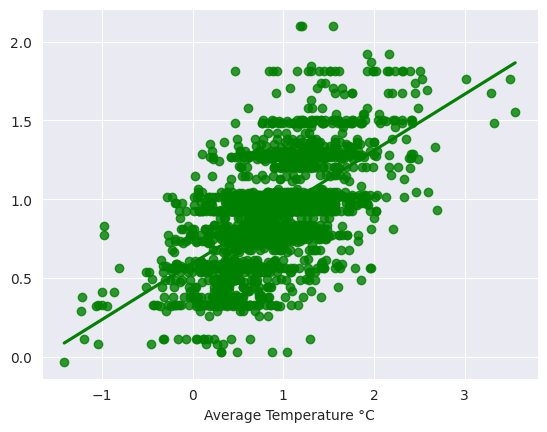

In [1681]:
sns.regplot(x = y_test, y = pred, ci = None, color = 'green')

In [1682]:
result = calculate_regression_metrics(y_test, pred)
print(result)

{'MSE': 0.20615668314923746, 'RMSE': 0.45404480301974326, 'MAE': 0.34428568343187843, 'R2': 0.35743549578650613}


In [1683]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

<Axes: xlabel='Average Temperature °C'>

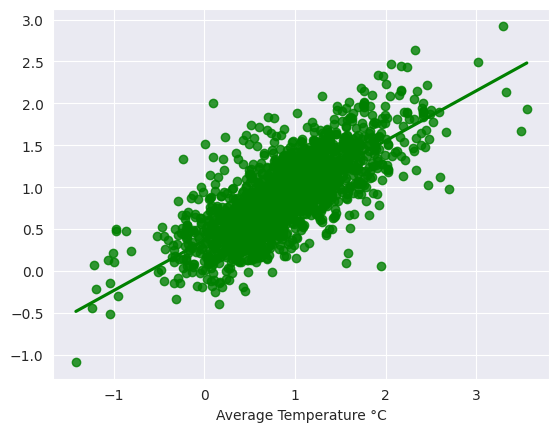

In [1684]:
sns.regplot(x = y_test, y = pred, ci = None, color = 'green')

In [1685]:
result = calculate_regression_metrics(y_test, pred)
print(result)

{'MSE': 0.1397569050926251, 'RMSE': 0.3738407483041744, 'MAE': 0.2729238271540225, 'R2': 0.5643952693677826}


In [1686]:
from sklearn.ensemble import GradientBoostingRegressor

model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

<Axes: xlabel='Average Temperature °C'>

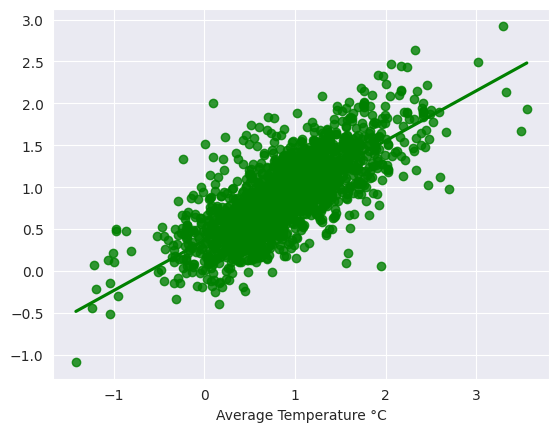

In [1687]:
sns.regplot(x = y_test, y = pred, ci = None, color = 'green')

In [1688]:
result = calculate_regression_metrics(y_test, pred)
print(result)

{'MSE': 0.1397569050926251, 'RMSE': 0.3738407483041744, 'MAE': 0.2729238271540225, 'R2': 0.5643952693677826}


# Other Working


In [1689]:
df = pd.read_csv("Agrofood_co2_emission.csv")
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [1690]:
df.fillna(df.mean())

<ipython-input-1690-a2478f315f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [1691]:
df.replace(np.nan , df.mean(), inplace = True)

<ipython-input-1691-636b1cf5d9be>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.replace(np.nan , df.mean(), inplace = True)


In [1692]:
df.shape

(6965, 31)

In [1693]:
df.isna().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

In [1694]:
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [1695]:
df.drop('Area', axis = 1, inplace = True)

In [1696]:
df

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,...,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,...,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,...,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,...,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [1697]:
df = df.round()

In [1698]:
df

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,1990,15.0,0.0,206.0,686.0,0.0,12.0,63.0,-2389.0,0.0,...,319.0,0.0,0.0,3009.0,9655167.0,2593947.0,5348387.0,5346409.0,2199.0,1.0
1,1991,15.0,0.0,209.0,678.0,0.0,12.0,61.0,-2389.0,0.0,...,342.0,0.0,0.0,3009.0,10230490.0,2763167.0,5372959.0,5372208.0,2324.0,0.0
2,1992,15.0,0.0,197.0,686.0,0.0,12.0,53.0,-2389.0,0.0,...,349.0,0.0,0.0,3009.0,10995568.0,2985663.0,6028494.0,6028939.0,2356.0,-0.0
3,1993,15.0,0.0,231.0,686.0,0.0,12.0,54.0,-2389.0,0.0,...,352.0,0.0,0.0,3009.0,11858090.0,3237009.0,7003641.0,7000119.0,2368.0,0.0
4,1994,15.0,0.0,242.0,706.0,0.0,12.0,54.0,-2389.0,0.0,...,368.0,0.0,0.0,3009.0,12690115.0,3482604.0,7733458.0,7722096.0,2501.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,1190.0,233.0,71.0,7.0,0.0,75.0,251.0,76500.0,10662.0,...,283.0,0.0,0.0,417.0,10934468.0,5215894.0,6796658.0,7656047.0,98491.0,1.0
6961,2017,1431.0,131.0,109.0,8.0,0.0,67.0,256.0,76500.0,10662.0,...,256.0,0.0,0.0,398.0,11201138.0,5328766.0,6940631.0,7810471.0,97159.0,0.0
6962,2018,1558.0,222.0,110.0,8.0,0.0,66.0,327.0,76500.0,10662.0,...,257.0,0.0,0.0,466.0,11465748.0,5447513.0,7086002.0,7966181.0,97668.0,1.0
6963,2019,1592.0,171.0,45.0,8.0,0.0,73.0,290.0,76500.0,10662.0,...,268.0,0.0,0.0,444.0,11725970.0,5571525.0,7231989.0,8122618.0,98988.0,1.0


<Axes: xlabel='Average Temperature °C', ylabel='count'>

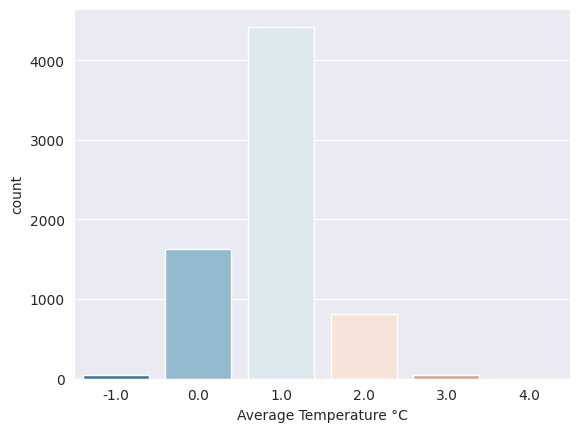

In [1699]:
df['Average Temperature °C'].value_counts()
sns.countplot(x = 'Average Temperature °C',data = df, palette = 'RdBu_r')

In [1700]:
df['Average Temperature °C'] = df['Average Temperature °C'].replace(4, 3)

In [1701]:
df['Average Temperature °C'].value_counts()

 1.0    4421
 0.0    1633
 2.0     819
-1.0      50
 3.0      42
Name: Average Temperature °C, dtype: int64

In [1702]:
y = df['Average Temperature °C']
from imblearn.combine import SMOTETomek
smk = SMOTETomek (random_state = 42)
xdata, ydata = smk.fit_resample(df, y)
xdata.shape, ydata.shape
from collections import Counter
print('original shape {}'.format(Counter(y)))
print('resampled shape {}'.format(Counter(ydata)))

original shape Counter({1.0: 4421, 0.0: 1633, 2.0: 819, -1.0: 50, 3.0: 42})
resampled shape Counter({3.0: 4404, -1.0: 4368, 2.0: 4076, 0.0: 3982, 1.0: 3737})


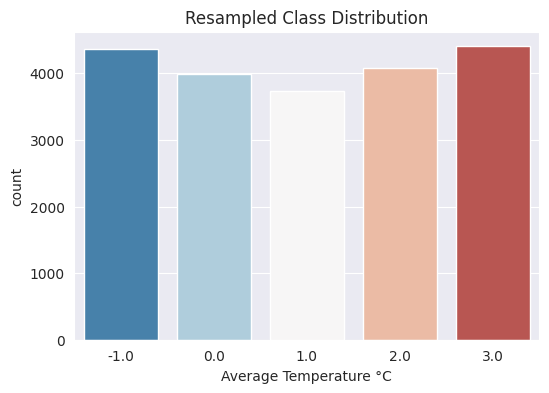

In [1703]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Average Temperature °C', data=pd.DataFrame({'Average Temperature °C': ydata}), palette='RdBu_r')
plt.title('Resampled Class Distribution')
plt.show()

In [1704]:
y = ydata
x = xdata
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [1705]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('number of trees used: ', rf.n_estimators)
pred = rf.predict(x_test)
acc1 = accuracy_score(y_test, pred)
acc1 *= 100
print('accuracy is: ', acc1)


number of trees used:  100
accuracy is:  99.88656619672662


In [1706]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state = 42)
model.fit(x_train, y_train)
print('number of trees used: ', model.n_estimators)
pred = model.predict(x_test)
acc1 = accuracy_score(y_test, pred)
acc1 *= 100
print('accuracy is: ', acc1)

number of trees used:  50
accuracy is:  61.659374493599096


In [1707]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, x_test, y_test):
    # Make predictions
    y_pred = model.predict(x_test)

    # Evaluate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Evaluate precision, recall, and F1 score
    # Choose the appropriate 'average' setting based on your requirements
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return acc, prec, rec, f1


In [1708]:
# Evaluating Random Forest
rf_acc, rf_prec, rf_rec, rf_f1 = evaluate_model(rf, x_test, y_test)
print("******Random Forest******")
print(f"Accuracy: {rf_acc*100:.4f}")
print(f"Precision: {rf_prec*100:.4f}")
print(f"Recall: {rf_rec*100:.4f}")
print(f"F1 Score: {rf_f1*100:.4f}")


******Random Forest******
Accuracy: 99.8866
Precision: 99.8869
Recall: 99.8866
F1 Score: 99.8866


# Part 3

<ipython-input-1709-4e86936d8548>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Emission'] = df['Fire Emission'] + df['Agriculture Activites'] + df['Food Activities'] + df['Land and Forestry'] + df['Energy Use']


Text(0.5, 1.0, 'Correlation Heatmap')

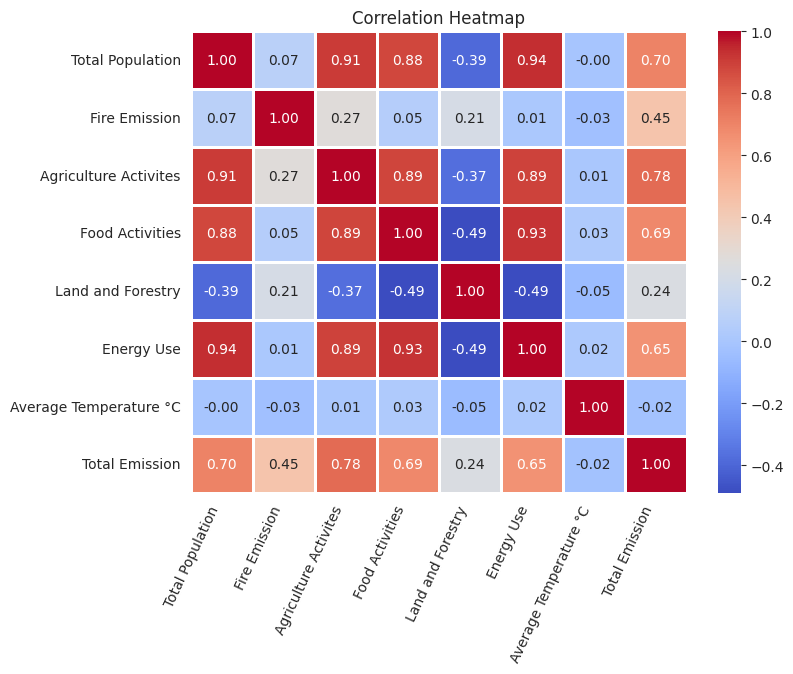

In [1709]:
df['Total Population'] = df['Rural population'] + df['Urban population']
df['Fire Emission'] = df['Savanna fires'] + df['Forest fires'] + df['Fires in organic soils'] + df['Fires in humid tropical forests']
df['Agriculture Activites'] = df['Crop Residues'] + df['Rice Cultivation'] + df['Drained organic soils (CO2)'] + df['Pesticides Manufacturing'] + df['Fertilizers Manufacturing'] + df['Manure Management'] + df['Manure applied to Soils'] + df['Manure left on Pasture']
df['Food Activities'] = df['Food Transport'] + df['Food Retail'] + df['Food Household Consumption'] + df['Food Packaging'] + df['Agrifood Systems Waste Disposal'] + df['Food Processing']
df['Land and Forestry'] = df['Forestland'] + df['Net Forest conversion']
df['Energy Use'] = df['On-farm Electricity Use'] + df['On-farm energy use']


df = df[['Total Population', 'Fire Emission', 'Agriculture Activites', 'Food Activities', 'Land and Forestry', 'Energy Use', 'Average Temperature °C']]
df['Total Emission'] = df['Fire Emission'] + df['Agriculture Activites'] + df['Food Activities'] + df['Land and Forestry'] + df['Energy Use']


corr = df.corr()


plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=65, horizontalalignment='right')

plt.title('Correlation Heatmap')

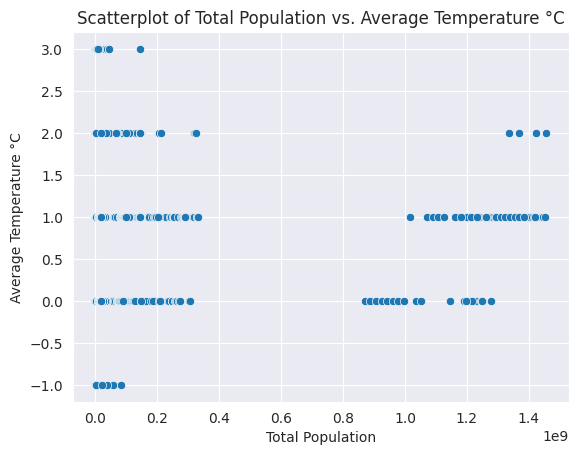

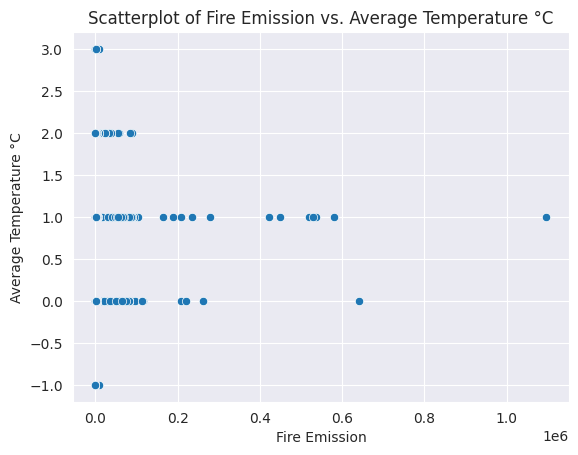

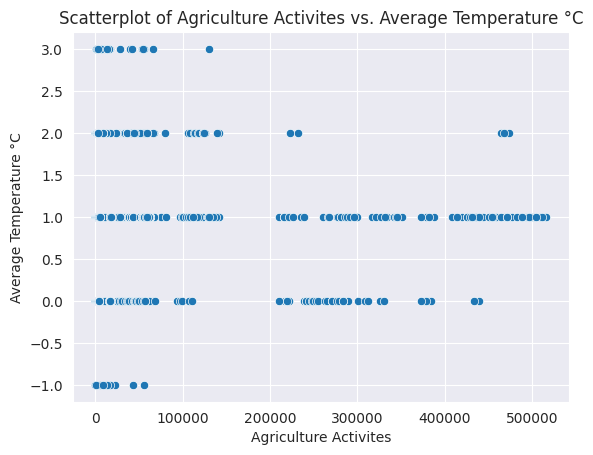

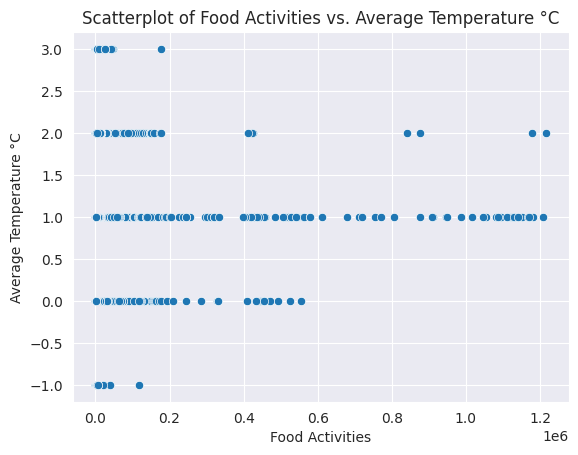

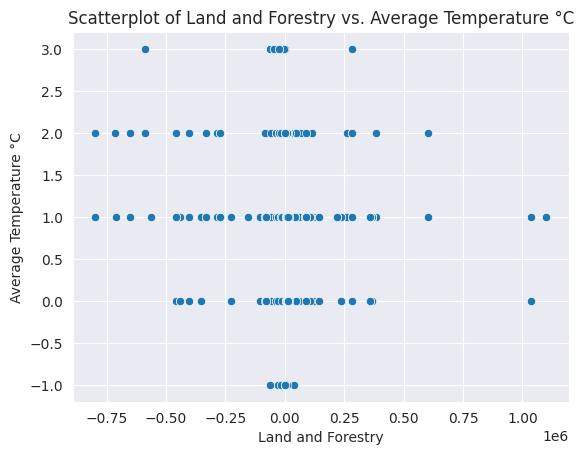

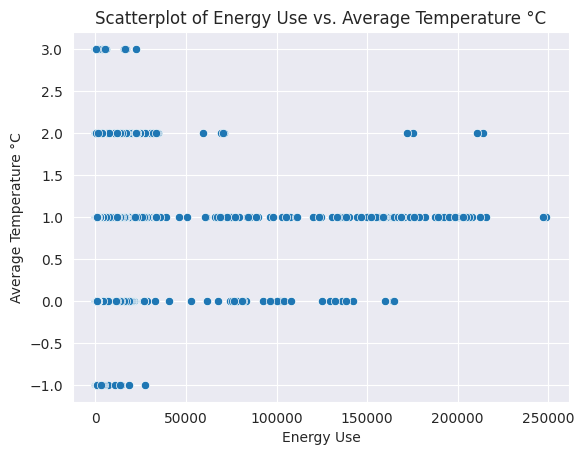

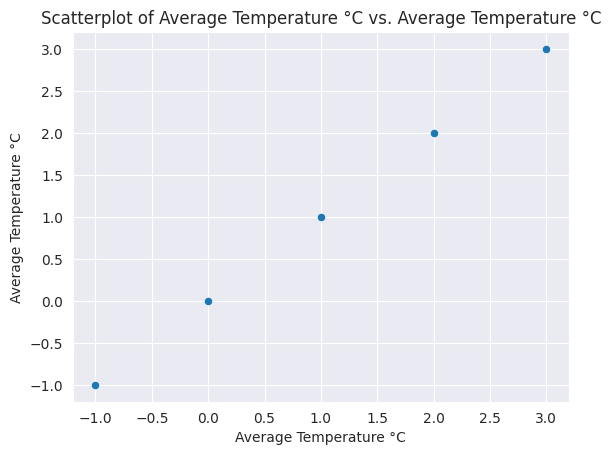

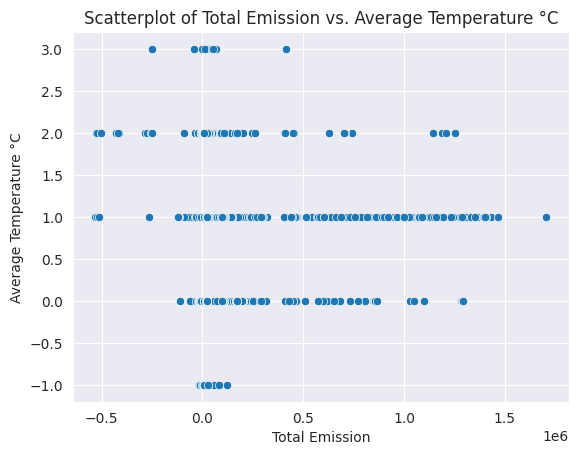

In [1710]:
for col in df.columns:
    sns.scatterplot(x=col, y=df.columns[-2], data=df)
    plt.title(f"Scatterplot of {col} vs. {df.columns[-2]}")
    plt.show()

In [1711]:
x = df.drop('Average Temperature °C', axis = 1)
y = df['Average Temperature °C']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train.head()

,Total Population,Fire Emission,Agriculture Activites,Food Activities,Land and Forestry,Energy Use,Total Emission
5432,108744.0,0.0,922.0,403.0,0.0,14.0,1339.0
2587,96283.0,0.0,922.0,384.0,0.0,23.0,1329.0
5636,75491.0,0.0,2710.0,349.0,0.0,24.0,3083.0
2079,1344072.0,0.0,5733.0,1662.0,-3819.0,460.0,4036.0
4937,5508611.0,4626.0,5395.0,2350.0,56303.0,3009.0,71683.0


In [1712]:
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

x_train.head()

,0,1,2,3,4,5,6
0,0.000074,0.00000,0.001164,0.000302,0.420013,0.000052,0.237735
1,0.000066,0.00000,0.001164,0.000286,0.420013,0.000088,0.237731
2,0.000051,0.00000,0.004638,0.000257,0.420013,0.000092,0.238515
3,0.000922,0.00000,0.010513,0.001336,0.418001,0.001843,0.238942
4,0.003781,0.00422,0.009856,0.001901,0.449677,0.012078,0.269196


In [1713]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [1714]:
result = calculate_regression_metrics(y_test, pred)
print(result)

{'MSE': 0.2829285664547601, 'RMSE': 0.5319102992561435, 'MAE': 0.3823682732438409, 'R2': 0.2785555755214497}


In [1715]:
teac = r2_score(y_test, pred)
teac = teac * 100
print(teac)

27.855557552144973
